Purpose: Run pyComBat on photosynthetic tissues only (leaf & stalk) and compare PCA of the resultant data with PCA of uncorrected data.<br>
Author: Anna Pardo<br>
Date initiated: Feb. 23, 2024

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from combat.pycombat import pycombat

In [2]:
# load TPM matrix
tpm = pd.read_csv("../../data/rawtpm_bptreat_noPEG.tsv",sep="\t",header="infer")
tpm.head()

,Sample,BioProject,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR11933261,PRJNA637522,Drought,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
1,SRR11933272,PRJNA637522,Drought,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
2,SRR11933250,PRJNA637522,Drought,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
3,SRR11933029,PRJNA637522,Control,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
4,SRR11933040,PRJNA637522,Drought,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [3]:
# Load metadata
md = pd.read_csv("../../data/metadata_corrected_14-Feb-2024.csv",sep=",",header="infer")
md.head()

,Unnamed: 0,BioProject,Sample,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Duration_hours,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,0,PRJNA637522,SRR11933261,238_WS2,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,312.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,1,PRJNA637522,SRR11933272,238_WS1,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,216.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,2,PRJNA637522,SRR11933250,268_WS1,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,216.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,3,PRJNA637522,SRR11933029,268_WW,NaN,268,Illumina HiSeq 2500,PAIRED,Control,216.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,4,PRJNA637522,SRR11933040,268_WS2,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,312.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [4]:
# add Tissue column to the TPM
tpmtis = md[["Sample","BioProject","Treatment","Tissue"]].merge(tpm)
tpmtis.head()

,Sample,BioProject,Treatment,Tissue,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR11933261,PRJNA637522,Drought,Leaf,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
1,SRR11933272,PRJNA637522,Drought,Leaf,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
2,SRR11933250,PRJNA637522,Drought,Leaf,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
3,SRR11933029,PRJNA637522,Control,Leaf,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
4,SRR11933040,PRJNA637522,Drought,Leaf,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [5]:
# subset TPM to only tissues of interest
tisint = ["Leaf","Shoot","Leaf meristem"]
subtpm = tpmtis[tpmtis["Tissue"].isin(tisint)]

In [6]:
# define a function from an answer in https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection
def variance_threshold_selector(data):
    selector = VarianceThreshold()
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [7]:
# set Sample as index and drop BioProject, Tissue, and Treatment columns
ttpm = subtpm.set_index("Sample").drop(["BioProject","Treatment","Tissue"],axis=1)
ttpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,0.0,1.122904,0.0,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
SRR11933272,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,0.0,2.280915,0.0,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
SRR11933250,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,0.0,1.908468,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
SRR11933029,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,0.0,1.619452,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
SRR11933040,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,0.0,2.264390,0.0,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [8]:
# put through VarianceThreshold() using the variance_threshold_selector() defined above
vttpm = variance_threshold_selector(ttpm)
vttpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,0.0,1.122904,0.0,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
SRR11933272,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,0.0,2.280915,0.0,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
SRR11933250,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,0.0,1.908468,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
SRR11933029,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,0.0,1.619452,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
SRR11933040,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,0.0,2.264390,0.0,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [9]:
# find how many zero-variance genes were eliminated
len(ttpm.columns)-len(vttpm.columns)

74

In [10]:
# log-transform TPM
vttpm_log = vttpm.apply(lambda x: np.log2(x+1))
vttpm_log.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,0.0,...,0.227968,0.000000,0.0,0.0,0.0,0.389017,0.0,0.000000,0.0,0.000000
SRR11933272,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,0.0,...,0.148026,0.173611,0.0,0.0,0.0,2.945473,0.0,0.000000,0.0,0.000000
SRR11933250,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.503415,0.0,0.326679,0.0,1.146231
SRR11933029,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.244933
SRR11933040,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,0.0,...,0.236712,0.017435,0.0,0.0,0.0,3.409421,0.0,0.000000,0.0,1.745435


In [11]:
# reset index & merge with metadata
comtpm = vttpm_log.reset_index().rename(columns={"index":"Sample"})
mdcomtpm = comtpm.merge(md[["Sample","BioProject"]],how="inner",on="Sample")
mdcomtpm.set_index("Sample",inplace=True)

In [12]:
# generate a list of dataframes each with a single BioProject
dflist = []
for i in range(len(mdcomtpm["BioProject"].unique())):
    t = mdcomtpm["BioProject"].unique()[i]
    dflist.append(mdcomtpm[mdcomtpm["BioProject"]==t])
dflist[0].head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030,BioProject
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,0.0,...,0.000000,0.0,0.0,0.0,0.389017,0.0,0.000000,0.0,0.000000,PRJNA637522
SRR11933272,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,0.0,...,0.173611,0.0,0.0,0.0,2.945473,0.0,0.000000,0.0,0.000000,PRJNA637522
SRR11933250,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,0.0,...,0.000000,0.0,0.0,0.0,0.503415,0.0,0.326679,0.0,1.146231,PRJNA637522
SRR11933029,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.244933,PRJNA637522
SRR11933040,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,0.0,...,0.017435,0.0,0.0,0.0,3.409421,0.0,0.000000,0.0,1.745435,PRJNA637522


In [13]:
# for each dataframe in dflist: remove the columns not beginning with Zm, then transpose the dataframe
dl2 = []
for df in dflist:
    filtered_columns = [col for col in df.columns if col.startswith("Zm")]
    df2 = df[filtered_columns]
    dl2.append(df2.transpose())

In [14]:
# generate the batch variable for BioProject
batch = []
for j in range(len(dl2)):
    batch.extend([j for _ in range(len(dl2[j].columns))])

In [15]:
# go back to vttpm_log and re-transpose it
vtpm_log = vttpm_log.transpose()
vtpm_log.head()

Sample,SRR11933261,SRR11933272,SRR11933250,SRR11933029,SRR11933040,SRR11932822,SRR11932811,SRR11933230,SRR11932879,SRR11933475,...,Ms71D3C,Ki3D1C,CML228D1D,CML333D3D,MO18WD3C,B73D3C,NC358D3C,P39D3D,M162WD3D,M162WD1D
Zm00001eb000010,3.760627,4.109013,3.326079,3.201844,3.507319,5.264161,5.354941,4.985365,4.608395,4.019939,...,1.27328,1.547709,1.279532,3.403289,1.155814,1.98776,1.481069,2.402443,2.149165,2.169362
Zm00001eb000020,1.731651,2.039269,1.994391,1.759475,1.925657,4.833336,4.550943,4.680800,3.103594,2.296733,...,0.00000,1.485257,0.000000,0.000000,1.548514,0.64318,0.234395,0.832973,0.464142,0.549750
Zm00001eb000050,0.060075,0.490802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383775,0.416658,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Zm00001eb000060,3.800400,3.038092,2.032962,1.447213,1.189432,4.931234,4.532830,4.534223,3.975189,3.898004,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Zm00001eb000070,2.644723,1.537277,1.842599,1.549133,2.254362,3.001007,3.102715,2.649520,1.668005,1.491079,...,0.00000,0.537870,0.000000,1.013190,0.000000,0.00000,0.000000,0.000000,1.411628,0.806190


In [16]:
# run pyComBat for BioProject
bpcor_tpm = pycombat(vtpm_log,batch)

Found 27 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.


/home/leviathan22/.local/lib/python3.8/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Adjusting the Data


In [17]:
# save bpcor_tpm
bpt.to_csv("../../data/psyn_tissues_tpm_combatBioProject.tsv",sep="\t",header=True,index=False)

NameError: name 'bpt' is not defined

In [18]:
# create a function to run PCA
def run_PCA(logtpm):
    pca = PCA(n_components=2)
    real_PCs = pca.fit_transform(logtpm)
    real_PCs_df = pd.DataFrame(data=real_PCs,columns=["PC1","PC2"])
    print(pca.explained_variance_ratio_)
    return real_PCs_df

In [19]:
cols = ["BioProject","Treatment","Developmental_stage","Tissue","Growth Env."]

In [20]:
bpt = bpcor_tpm.transpose()

In [21]:
bpcor_rpcdf = run_PCA(bpt)

[0.18686023 0.09356736]


In [22]:
nocor_rpcdf = run_PCA(vttpm_log)

[0.24816272 0.11123947]


In [23]:
# reset index (after running PCA)
bpt.reset_index(inplace=True)
bpt.rename(columns={"index":"Sample"},inplace=True)

vttpm_log.reset_index(inplace=True)
vttpm_log.rename(columns={"index":"Sample"},inplace=True)

In [24]:
# merge with metadata
## note this has to maintain the sample order of vttpm_log, otherwise when we concatenate it with the PC df everything will be
## incorrectly matched up
bptm = bpt.merge(md,how="inner")

vttpm_log_merged = vttpm_log.merge(md,how="inner")

In [25]:
# append metadata to PCA df
bpcor_plotdf = pd.concat([bpcor_rpcdf,bptm[["BioProject","Treatment","Developmental_stage","Tissue","Growth Env."]]],axis=1)

nocor_plotdf = pd.concat([nocor_rpcdf,vttpm_log_merged[["BioProject","Treatment","Developmental_stage","Tissue","Growth Env."]]],axis=1)

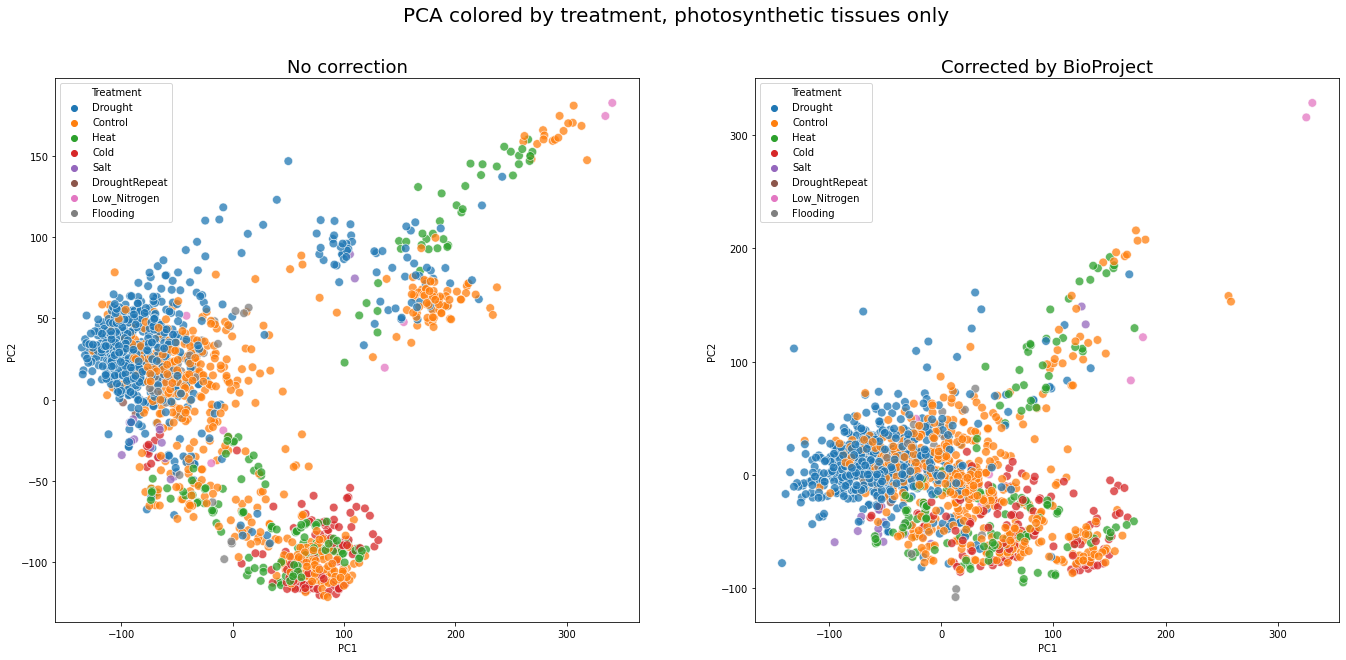

In [30]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(23,10))

a = sns.scatterplot(ax=ax[0],x=nocor_plotdf["PC1"],y=nocor_plotdf["PC2"],hue=nocor_plotdf["Treatment"],palette="tab10",s=75,alpha=0.75)
a.set_title("No correction",fontsize=18)
b = sns.scatterplot(ax=ax[1],x=bpcor_plotdf["PC1"],y=bpcor_plotdf["PC2"],hue=bpcor_plotdf["Treatment"],palette="tab10",s=75,alpha=0.75)
b.set_title("Corrected by BioProject",fontsize=18)
plt.suptitle("PCA colored by treatment, photosynthetic tissues only",fontsize=20)
plt.savefig("../../figures/PCA/03-Apr-2024_PCA_corVSnoncor_bytreatment_psyn.svg",bbox_inches="tight")
plt.savefig("../../figures/PCA/03-Apr-2024_PCA_corVSnoncor_bytreatment_psyn.pdf",bbox_inches="tight")
plt.savefig("../../figures/PCA/03-Apr-2024_PCA_corVSnoncor_bytreatment_psyn.png",bbox_inches="tight")

In [31]:
# generate a list containing the first 20 BioProjects
half_bioprojects = []
count = 0
while count < 20:
    half_bioprojects.append(nocor_plotdf["BioProject"].unique()[count])
    count += 1

In [32]:
# generate dataframes each containing 20 or 7 of the BioProjects
nocor_plotdf1 = nocor_plotdf[nocor_plotdf["BioProject"].isin(half_bioprojects)]
nocor_plotdf2 = nocor_plotdf[~nocor_plotdf["BioProject"].isin(half_bioprojects)]

bpcor_plotdf1 = bpcor_plotdf[bpcor_plotdf["BioProject"].isin(half_bioprojects)]
bpcor_plotdf2 = bpcor_plotdf[~bpcor_plotdf["BioProject"].isin(half_bioprojects)]

Text(0.5, 0.98, 'PCA plotted by BioProject and growth environment, photosynthetic tissues only')

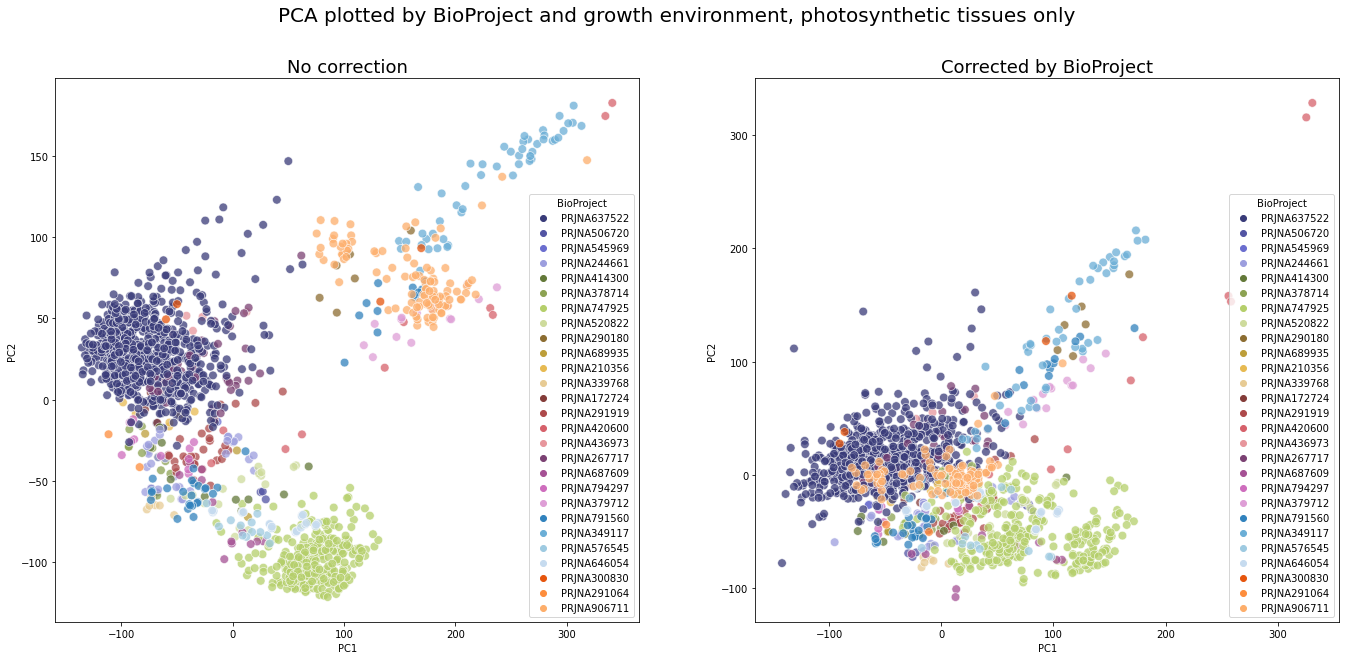

In [36]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(23,10))

a = sns.scatterplot(ax=ax[0],x=nocor_plotdf1["PC1"],y=nocor_plotdf1["PC2"],hue=nocor_plotdf1["BioProject"],palette="tab20b",s=75,alpha=0.75)
a = sns.scatterplot(ax=ax[0],x=nocor_plotdf2["PC1"],y=nocor_plotdf2["PC2"],hue=nocor_plotdf2["BioProject"],palette="tab20c",s=75,alpha=0.75)
a.set_title("No correction",fontsize=18)
b = sns.scatterplot(ax=ax[1],x=bpcor_plotdf1["PC1"],y=bpcor_plotdf1["PC2"],hue=bpcor_plotdf1["BioProject"],palette="tab20b",s=75,alpha=0.75)
b = sns.scatterplot(ax=ax[1],x=bpcor_plotdf2["PC1"],y=bpcor_plotdf2["PC2"],hue=bpcor_plotdf2["BioProject"],palette="tab20c",s=75,alpha=0.75)
b.set_title("Corrected by BioProject",fontsize=18)
plt.suptitle("PCA plotted by BioProject and growth environment, photosynthetic tissues only",fontsize=20)

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(23,10))

a = sns.scatterplot(ax=ax[0],x=nocor_plotdf["PC1"],y=nocor_plotdf["PC2"],hue=nocor_plotdf["Growth Env."],palette="tab10",s=75,alpha=0.75)
a.set_title("No correction",fontsize=18)
b = sns.scatterplot(ax=ax[1],x=bpcor_plotdf["PC1"],y=bpcor_plotdf["PC2"],hue=bpcor_plotdf["Growth Env."],palette="tab10",s=75,alpha=0.75)
b.set_title("Corrected by BioProject",fontsize=18)

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(23,10))

a = sns.scatterplot(ax=ax[0],x=nocor_plotdf["PC1"],y=nocor_plotdf["PC2"],hue=nocor_plotdf["Tissue"],palette="tab10",s=75,alpha=0.75)
a.set_title("No correction",fontsize=18)
b = sns.scatterplot(ax=ax[1],x=bpcor_plotdf["PC1"],y=bpcor_plotdf["PC2"],hue=bpcor_plotdf["Tissue"],palette="tab10",s=75,alpha=0.75)
b.set_title("Corrected by BioProject",fontsize=18)

In [ ]:
# generate a dictionary in which the keys are developmental stages from the metadata and values indicate Vegetative or 
## Reproductive

devstage = {}
for d in nocor_plotdf["Developmental_stage"].unique():
    if type(d)==str:
        if d.startswith("V"):
            if d != "VT":
                devstage[d] = "Vegetative"
        elif "poll" in d:
            devstage[d] = "Reproductive"
        elif d=="4 days after sowing":
            devstage[d] = "Vegetative"
        elif d.startswith("R"):
            devstage[d] = "Reproductive"
        elif "DAP" in d:
            devstage[d] = "Reproductive"
        elif d=="14 days old":
            devstage[d] = "Vegetative"
        elif d=="Germination":
            devstage[d] = "Vegetative"
        elif d=="Two weeks old":
            devstage[d] = "Vegetative"
        elif d=="Seedling":
            devstage[d] = "Vegetative"
        elif d=="5 weeks old":
            devstage[d] = "Vegetative"
        elif d==">=V4":
            devstage[d] = "Vegetative"
        elif d=="45 days after germination":
            devstage[d] = "Vegetative"
        elif d=="Mature Plant":
            devstage[d] = "Reproductive"
            
        if d=="VT":
            devstage[d] = "Reproductive"

In [ ]:
# generate a new column for vegetative or reproductive
nocor_plotdf["DevVegRep"] = nocor_plotdf["Developmental_stage"].map(devstage)
bpcor_plotdf["DevVegRep"] = bpcor_plotdf["Developmental_stage"].map(devstage)

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(23,10))

a = sns.scatterplot(ax=ax[0],x=nocor_plotdf["PC1"],y=nocor_plotdf["PC2"],hue=nocor_plotdf["DevVegRep"],palette="tab10",s=75,alpha=0.75)
a.set_title("No correction",fontsize=18)
b = sns.scatterplot(ax=ax[1],x=bpcor_plotdf["PC1"],y=bpcor_plotdf["PC2"],hue=bpcor_plotdf["DevVegRep"],palette="tab10",s=75,alpha=0.75)
b.set_title("Corrected by BioProject",fontsize=18)

In [ ]:
bpt = pd.read_csv("../../data/psyn_tissues_tpm_combatBioProject.tsv",sep="\t",header="infer")

In [ ]:
# what happens if we further run pyComBat for growth environment?

mdcomtpm = bpt.merge(md[["Sample","Growth Env."]],how="inner",on="Sample")
mdcomtpm.set_index("Sample",inplace=True)

In [ ]:
# convert NA to "unknown"
mdcomtpm = mdcomtpm.fillna(value="unknown")

In [ ]:
# generate a list of dataframes each with a single growth env
dflist = []
for i in range(len(mdcomtpm["Growth Env."].unique())):
    t = mdcomtpm["Growth Env."].unique()[i]
    dflist.append(mdcomtpm[mdcomtpm["Growth Env."]==t])

In [ ]:
# for each dataframe in dflist: remove the columns not beginning with Zm, then transpose the dataframe
dl2 = []
for df in dflist:
    filtered_columns = [col for col in df.columns if col.startswith("Zm")]
    df2 = df[filtered_columns]
    dl2.append(df2.transpose())

In [ ]:
# generate the batch variable: growth environment
batch = []
for j in range(len(dl2)):
    batch.extend([j for _ in range(len(dl2[j].columns))])

In [ ]:
bpcor_tpm = bpt.transpose()

In [ ]:
# run pyComBat for growth environment
gecor_tpm = pycombat(bpcor_tpm,batch)